# Classical Dicke Model
by PhD. Jorge Chávez Carlos

This notebook solves the classical Dicke model and it shows the trayectory in the phase space.
For more information about the formulation and the chaotic analysis you can check the paper:
https://journals.aps.org/pre/abstract/10.1103/PhysRevE.94.022209

In [1]:
#Importing packages
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Defining parameters, initial conditions and calculating energy shell of the dynamics

In [2]:
#-----------------------Parameters------------------------
ff = 2; #gamma/gamma_c
omega = 1; #
omega0 = 1; #
gammac = ((omega*omega0)**(0.5))/2;
gamma = ff*gammac;
#Initial conditions
p0 = 0.0;
q0 = 0.2;
P0 = 0.0;
Q0 = 0.1;
#-----------------------The Hamiltonian------------------------
def H(p,q,P,Q):
    global ff,omega,omega0,gammac,gamma
    ene = ((omega0/2)*(Q**2 + P**2) - omega0 + (omega/2)*(q**2 + p**2) +  2*gamma*q*Q*(1 - ((Q**2 + P**2)/4))**(0.5))/omega0
    return ene
ener = H(p0,q0,P0,Q0)
print("Energy: ", ener ,"omega_0")

Energy:  -0.9350500312891236 omega_0


In the next part, the code construc the dynamics using the fourth Hamilton equations given for the Hamiltonian expresed avobe

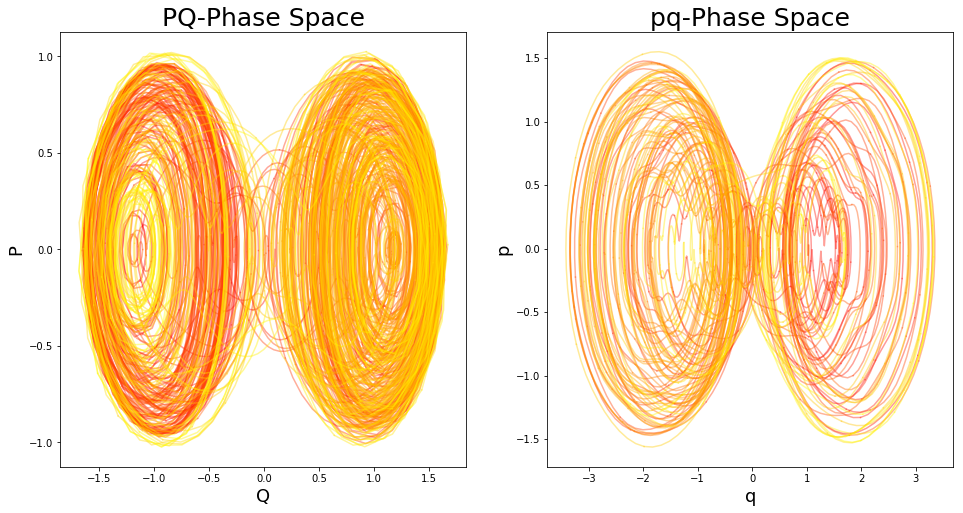

In [3]:
# Maximum time point and total number of time points
tmax, n = 1000, 10000
#-----------------------Dynamical System------------------------
# 4-Hamilton equations
def SIS(X, t, ff, omega, omega0, gammac, gamma):
    """The Hamilton equations."""
    p,q,P,Q = X
    dpdt = (-2*Q*((1 + (1/4)*(-P**2 - Q**2))**(0.5))*gamma - q*omega)/omega0
    dqdt = (p*omega)/omega0
    dPdt = (q*Q**2*gamma/(2*(1 - (1/4)*(P**2 + Q**2)))**(0.5) - 2*q*(1 - (1/4)*(P**2 + Q**2))**(0.5)*gamma - Q*omega0)/omega0
    dQdt = (-P*q*Q*gamma/(2*(1 - (1/4)*(P**2 + Q**2)))**(0.5) + P*omega0)/omega0
    return dpdt, dqdt, dPdt, dQdt

# Integrate the Lorenz equations on the time grid t
t = np.linspace(0, tmax, n)
f = odeint(SIS, (p0, q0, P0, Q0), t, args=(ff, omega, omega0, gammac, gamma))
x, y, z, w = f.T

# Plot the orbits in the respective proyections in the phase space
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
c = np.linspace(0,1,n)
for i in range(0,n-s,s):
    axes[0].plot(w[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)
    axes[1].plot(y[i:i+s+1], x[i:i+s+1], color=(1,c[i],0), alpha=0.4)

axes[0].set_title('PQ-Phase Space', fontsize=25)
axes[0].set_ylabel("P", fontsize=18)
axes[0].set_xlabel("Q", fontsize=18)

axes[1].set_title('pq-Phase Space', fontsize=25)
axes[1].set_ylabel("p", fontsize=18)
axes[1].set_xlabel("q", fontsize=18)

plt.savefig('Dicke.png')
plt.show()